In [ ]:
# NumPy for math operations, and Pandas for processing tabular data.
import numpy as np
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# scikit-learn package
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.datasets import make_classification  # If needed, replace with your data
from sklearn_genetic import GAFeatureSelectionCV

# xgboost package
from xgboost import XGBClassifier

# remove warnings from multiclass
import warnings
warnings.filterwarnings("ignore")



In [3]:
#drive.mount('/content/drive')  # This will prompt you to authorize access.
#file_path = '/content/drive/My Drive/Colab Notebooks/sph6004_processed_data.csv'
#data_reduced = pd.read_csv(file_path)
data_reduced = pd.read_csv('/Users/cuprum/Desktop/SPH6004/sph6004_processed_data.csv')
data_reduced.head()


,Unnamed: 0,aki_stage,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,...,abs_neutrophils_min,inr_min,ptt_min,ptt_max,gcs_motor,gcs_verbal,gcs_eyes,weight_admit,gender_encode,race_encode
0,1,0,-0.726120,1.426311,0.127268,-0.671363,-2.417941,-1.907083,-0.558165,-1.511171,...,-1.273357,1.712012,0.527348,-0.253884,0.503565,0.307478,0.804525,-1.876904,1,29
1,2,0,0.670485,-0.125384,-1.111194,2.186180,0.434657,1.467070,1.907899,1.997142,...,0.785308,-0.479852,-0.676301,1.088980,0.503565,0.784903,0.804525,-0.238462,1,8
2,3,0,-0.532239,0.549266,0.176806,1.412262,0.117701,1.017565,1.731752,1.790771,...,-1.273357,-0.479852,0.384981,-0.162842,0.503565,0.784903,0.804525,-0.461076,1,29
3,4,0,-1.092951,-1.002428,-0.566271,-1.207152,-1.512355,-1.348867,-0.205870,-0.272943,...,0.785308,-0.792976,-0.093890,-0.344925,0.503565,0.784903,0.804525,-0.416553,1,29
4,5,2,0.701542,-2.149333,-1.111194,-0.016509,1.430802,0.287396,-3.112303,1.790771,...,0.785308,-0.166729,-1.142229,4.138873,-2.514037,-1.602222,-1.913092,-0.737118,1,8


In [4]:

y = data_reduced['aki_stage']
X = data_reduced.iloc[:, 2:]

# Convert the 'race_encode' column to a categorical type.
X['race_encode'] = X['race_encode'].astype('category')

# Apply one-hot encoding to the 'race_encode' column, drops the first dummy to avoid multicollinearity.
X = pd.get_dummies(X, columns=['race_encode'], drop_first=True)

# Similarly for the 'gender_encode' column to a categorical type.
X['gender_encode'] = X['gender_encode'].astype('category')
X = pd.get_dummies(X, columns=['gender_encode'], drop_first=True)


In [5]:
X 
# Take a look.

,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,mbp_min,mbp_max,...,race_encode_25,race_encode_26,race_encode_27,race_encode_28,race_encode_29,race_encode_30,race_encode_31,race_encode_32,race_encode_33,gender_encode_2
0,-0.726120,1.426311,0.127268,-0.671363,-2.417941,-1.907083,-0.558165,-1.511171,-0.317005,-1.738145,...,False,False,False,False,True,False,False,False,False,False
1,0.670485,-0.125384,-1.111194,2.186180,0.434657,1.467070,1.907899,1.997142,1.707651,1.392992,...,False,False,False,False,False,False,False,False,False,False
2,-0.532239,0.549266,0.176806,1.412262,0.117701,1.017565,1.731752,1.790771,1.482690,1.162762,...,False,False,False,False,True,False,False,False,False,False
3,-1.092951,-1.002428,-0.566271,-1.207152,-1.512355,-1.348867,-0.205870,-0.272943,-0.466979,-0.633037,...,False,False,False,False,True,False,False,False,False,False
4,0.701542,-2.149333,-1.111194,-0.016509,1.430802,0.287396,-3.112303,1.790771,-1.066877,1.162762,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,-1.232538,0.414336,0.374960,0.757409,0.978009,0.960068,1.819826,0.500950,1.782639,0.702300,...,False,False,False,False,True,False,False,False,False,True
44991,1.037480,-0.462708,-0.318579,-0.135573,0.162981,-0.311362,-0.646239,-0.737278,-0.391992,-0.633037,...,False,False,False,False,True,False,False,False,False,True
44992,-0.990979,1.561241,0.325422,-0.135573,-1.150120,-0.861216,1.115236,-0.014978,0.957779,-0.264668,...,False,False,False,False,True,False,False,False,False,False
44993,-0.368054,0.077011,-0.120425,-1.088088,-0.878444,-0.915628,-0.382018,0.500950,-0.691941,-0.126530,...,False,False,False,False,True,False,False,False,False,True


In [6]:
# Split data into training and testing sets.
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X, y, test_size=0.2, random_state=13)

Fit to multunominal class since y is multiclass

In [20]:
# Define Logistic Regression with ElasticNet
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=500,
    multi_class='multinomial',
    random_state=13
)

# Define the parameter grid for tuning l1_ratio and C
param_grid = {
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'C': [0.01, 0.1, 1.0, 10]
}

# Use GridSearchCV to tune l1_ratio and C
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_df_train, y_df_train)

# Best hyperparameters:
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)


/Users/cuprum/opt/anaconda3/envs/sph6004_2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/cuprum/opt/anaconda3/envs/sph6004_2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/cuprum/opt/anaconda3/envs/sph6004_2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/cuprum/opt/anaconda3/envs/sph6004_2/lib/pytho

Best parameters found by GridSearchCV: {'C': 0.1, 'l1_ratio': 0.7}


In [ ]:
# Define the logistic regression model with elastic net regularization (equal L1 and L2)
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.7,
    C= 0.1,
    max_iter=500,
    multi_class='multinomial',
    random_state=13
)

# Set up the Genetic Algorithm based feature selection
ga_fs = GAFeatureSelectionCV(
    estimator=model,
    scoring="accuracy",
    max_features=20,
    population_size=30,
    crossover_probability = 0.5,
    mutation_probability =0.2,
    generations=20
)

# Fit the GA-based feature selection on the training data
ga_fs.fit(X_df_train, y_df_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	-49999.8	50000.2    	0.459079   	-100000    
1  	34    	-26666.4	44221.8    	0.464079   	-100000    
2  	32    	0.431288	0.0238804  	0.464079   	0.39171    
3  	38    	0.445043	0.0186252  	0.464079   	0.39171    
4  	38    	0.457364	0.0102736  	0.464079   	0.434104   
5  	44    	0.463653	0.00451437 	0.468358   	0.440104   
6  	49    	0.464652	0.00132551 	0.468358   	0.464079   
7  	45    	0.465757	0.00181371 	0.468358   	0.464079   
8  	38    	0.466906	0.00167223 	0.468358   	0.464079   
9  	41    	0.467958	0.00102803 	0.468441   	0.464079   
10 	42    	0.468306	0.00041259 	0.468663   	0.466107   
11 	45    	0.468317	0.000414954	0.468663   	0.466107   
12 	42    	0.468434	7.23499e-05	0.468663   	0.468358   
13 	42    	0.468567	0.000215759	0.469163   	0.468358   
14 	41    	0.468715	0.000258198	0.469163   	0.468441   
15 	40    	0.468853	0.000274075	0.469163   	0.468441   
16 	45    	0.469076	0.000194945	0.469163   	0.46

GAFeatureSelectionCV(crossover_probability=0.5,
                     estimator=LogisticRegression(C=0.1, l1_ratio=0.7,
                                                  max_iter=500,
                                                  multi_class='multinomial',
                                                  penalty='elasticnet',
                                                  random_state=13,
                                                  solver='saga'),
                     generations=20, max_features=20, mutation_probability=0.2,
                     population_size=30, scoring='accuracy')

In [ ]:
# Retrieve the selected features
selected_features = X_df_train.columns[ga_fs.support_]
print(selected_features)

Selected features:
Index(['admission_age', 'sbp_mean', 'mbp_max', 'resp_rate_min',
       'resp_rate_mean', 'temperature_vital_min', 'aniongap_min', 'bun_min',
       'calcium_lab_max', 'chloride_lab_min', 'chloride_lab_max',
       'creatinine_min', 'potassium_lab_min', 'potassium_lab_max',
       'gcs_verbal', 'weight_admit', 'race_encode_2', 'race_encode_31',
       'gender_encode_2'],
      dtype='object')


In [ ]:
# Reserve a copy of the selected features.
selected_features = [
    'admission_age',
    'sbp_mean',
    'mbp_max',
    'resp_rate_min',
    'resp_rate_mean',
    'temperature_vital_min',
    'aniongap_min',
    'bun_min',
    'calcium_lab_max',
    'chloride_lab_min',
    'chloride_lab_max',
    'creatinine_min',
    'potassium_lab_min',
    'potassium_lab_max',
    'gcs_verbal',
    'weight_admit',
    'race_encode_2',
    'race_encode_31',
    'gender_encode_2'
]


In [12]:
# Subset the training and testing data with the selected features.
X_train_selected = X_df_train[selected_features]
X_test_selected  = X_df_test[selected_features]

In [21]:
# Define the logistic regression model with elastic net regularization.
# 'saga' is used to for elastic net and multinomial setting.
logistic_model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.3, # mostly L2 since we reduced features so L1 not so necessary #try 0.7 later
    C = 0.1, #this line was newly added, to be tested
    multi_class='multinomial',
    max_iter=500,         
    random_state=13
)

# Evaluate the model using 5-fold cross-validation on the training set.
log_cv_scores = cross_val_score(logistic_model, X_train_selected, y_df_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy Scores:", log_cv_scores)
print("Logistic Regression Mean CV Accuracy:", log_cv_scores.mean())

# Fit the model
logistic_model.fit(X_train_selected, y_df_train)


Logistic Regression CV Accuracy Scores: [0.475      0.46950965 0.46284206 0.46784276 0.46867621]
Logistic Regression Mean CV Accuracy: 0.468774135296569


LogisticRegression(C=0.1, l1_ratio=0.3, max_iter=500, multi_class='multinomial',
                   penalty='elasticnet', random_state=13, solver='saga')

In [ ]:
# Compute the test accuracy
y_pred = logistic_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_df_test, y_pred)
print("Logistic Regression Test Accuracy:", test_accuracy)


Logistic Regression Test Accuracy: 0.46938548727636403


In [41]:
cm = confusion_matrix(y_df_test, y_pred)
cm

array([[1941,    7,  998,   45],
       [ 757,    7,  852,   82],
       [ 928,    6, 1886,  130],
       [ 242,    8,  720,  390]])

In [43]:
y_df_test.value_counts()

aki_stage
0    2991
2    2950
1    1698
3    1360
Name: count, dtype: int64

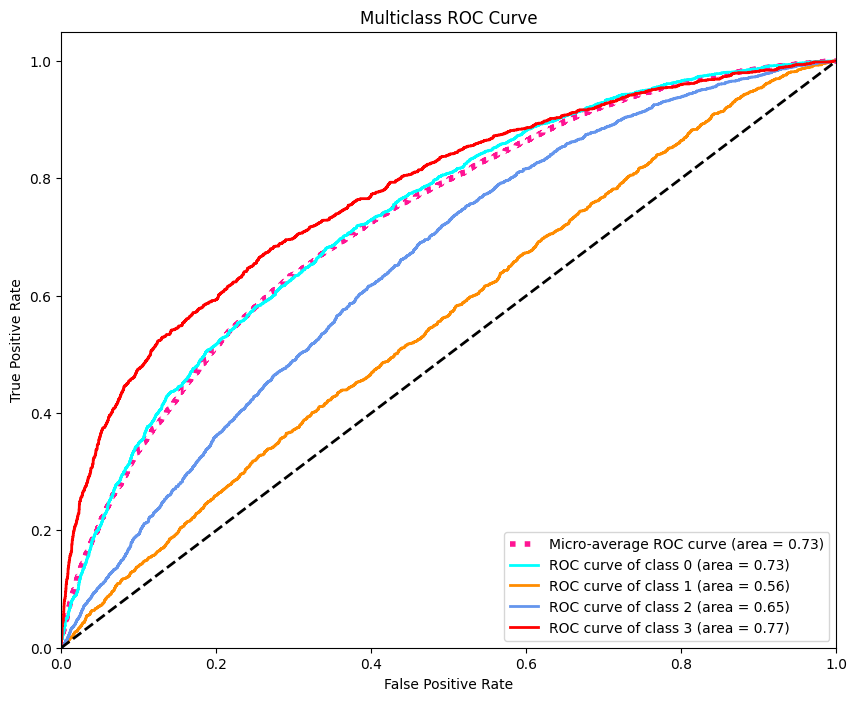

In [42]:
# Compute the AUROC score using the probabilities.
y_pred_proba = logistic_model.predict_proba(X_test_selected)
# Compute the true labels for ROC computation.
classes = np.unique(y_df_test)
y_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = len(classes)

# Compute ROC curves and AUC for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC.
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves.
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

# Define colors
colors = ["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Initialize the Decision Tree classifier.
dt_model = DecisionTreeClassifier(random_state=13)

# Fit the model.
dt_model.fit(X_train_selected, y_df_train)

# Predict on the test set.
y_pred = dt_model.predict(X_test_selected)

# Calculate the test accuracy.
test_accuracy = accuracy_score(y_df_test, y_pred)
print("Decision Tree Test Accuracy:", test_accuracy)

Decision Tree Test Accuracy: 0.35292810312256917


In [56]:
cm = confusion_matrix(y_df_test, y_pred)
print(cm)

[[1267  623  840  261]
 [ 534  365  583  216]
 [ 805  574 1142  429]
 [ 255  254  449  402]]


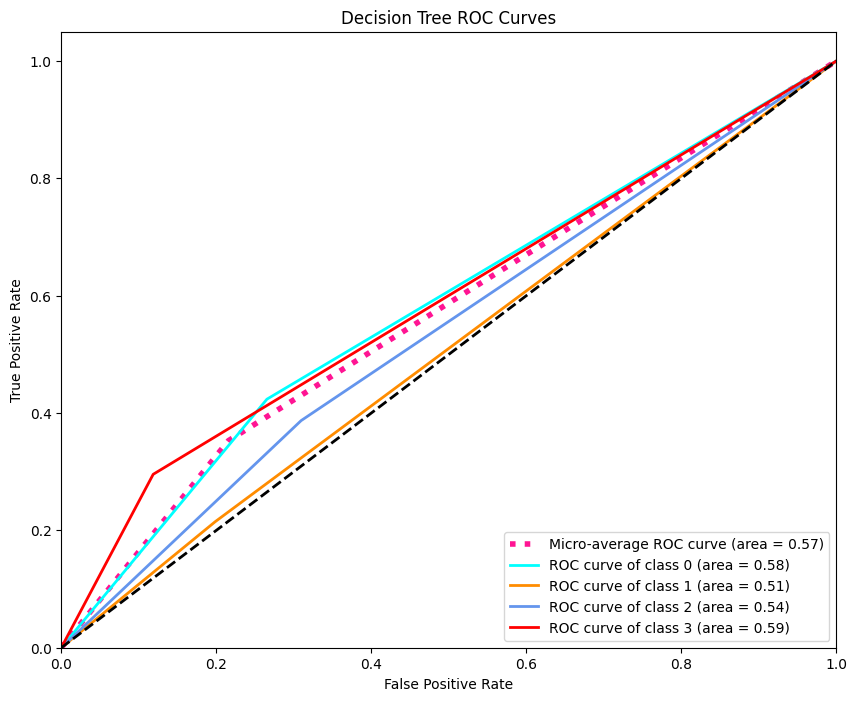

In [57]:
# Get predicted probabilities from the Decision Tree model
y_dt_proba = dt_model.predict_proba(X_test_selected)

# Binarize the true test labels (for multiclass ROC)
classes = np.unique(y_df_test)
y_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = len(classes)

# Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_dt_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_dt_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

colors = ["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curves")
plt.legend(loc="lower right")
plt.show()


In [44]:
# Adjusted parameter grid for a dataset with 15 features and 10,000 rows.
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest.
    'max_depth': [None, 5, 10, 20],          # Maximum depth of the trees.
    'min_samples_split': [2, 5],           # Minimum samples required to split a node.
    'min_samples_leaf': [1, 2],            # Minimum samples required at a leaf node.
    'max_features': ['sqrt', 'log2']       # Strategy for selecting a subset of features.
}

# Initialize the Random Forest classifier.
rf_model = RandomForestClassifier(random_state=13)

# Set up GridSearchCV with 5-fold cross-validation.
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search 
grid_search.fit(X_train_selected, y_df_train)

# Print the best parameters and best cross-validation accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Use the best estimator to predict on the test set.
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_df_test, y_pred)
print("Random Forest Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.4737748645645229
Random Forest Test Accuracy: 0.47683075897321925


In [47]:
# Predict on the test set.
best_rf_model.fit(X_train_selected, y_df_train)
y_pred_rf = best_rf_model.predict(X_test_selected)
test_accuracy_rf = accuracy_score(y_df_test, y_pred_rf)
print("Random forest Test Accuracy:", test_accuracy_rf)

Random forest Test Accuracy: 0.47683075897321925


In [51]:
cm = confusion_matrix(y_df_test, y_pred_dt)
print(cm)

[[1891   32 1008   60]
 [ 685   19  896   98]
 [ 804   24 1943  179]
 [ 186    9  727  438]]


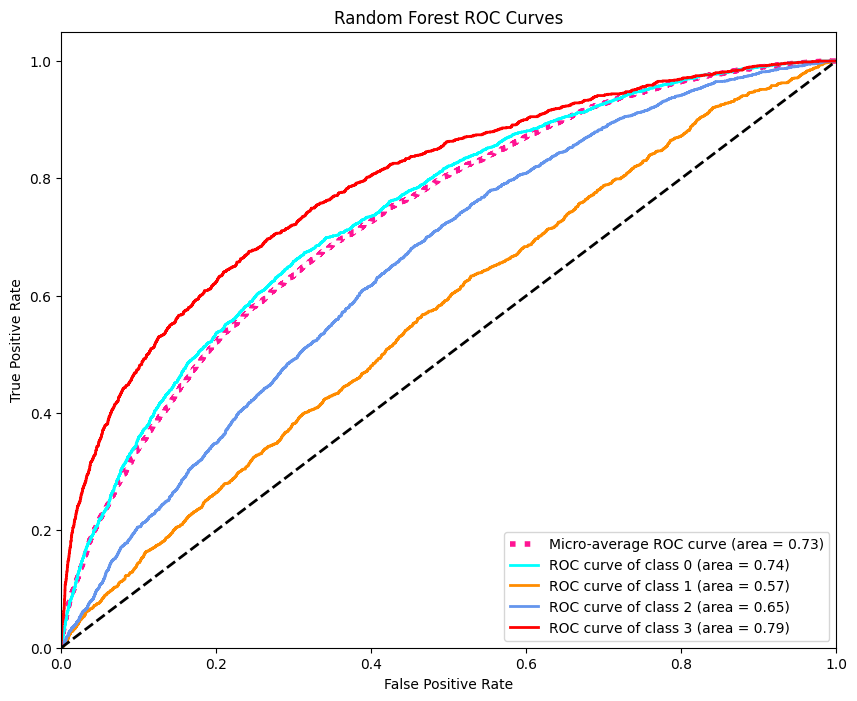

In [53]:
# Get predicted probabilities from the best Random Forest model
y_rf_proba = best_rf_model.predict_proba(X_test_selected)

# Binarize the true test labels (for multiclass ROC)
classes = np.unique(y_df_test)
y_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = len(classes)

# Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_rf_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_rf_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

colors = ["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curves")
plt.legend(loc="lower right")
plt.show()


In [17]:
# AdaBoost 
ada_model = AdaBoostClassifier(random_state=42)
ada_cv_scores = cross_val_score(ada_model, X_train_selected, y_df_train, cv=5, scoring='accuracy')
print("AdaBoost CV Accuracy Scores:", ada_cv_scores)
print("AdaBoost Mean CV Accuracy:", ada_cv_scores.mean())


AdaBoost CV Accuracy Scores: [0.45069444 0.45103487 0.45256286 0.45256286 0.44922906]
AdaBoost Mean CV Accuracy: 0.45121681637881805


In [18]:
# Train the model
ada_model.fit(X_train_selected, y_df_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test_selected)

# Calculate the test accuracy
test_accuracy_ada = accuracy_score(y_df_test, y_pred_ada)
print("AdaBoost Test Accuracy:", test_accuracy_ada)

# confusion matrix.
cm = confusion_matrix(y_df_test, y_pred_ada)
print("Confusion Matrix:")
print(cm)


AdaBoost Test Accuracy: 0.45516168463162576


In [13]:
# Define the XGBoost classifier.
xgb_model = XGBClassifier(random_state=13, eval_metric='mlogloss', use_label_encoder=False)

# Evaluate the model using 5-fold cross-validation on the selected training set.
xgb_cv_scores = cross_val_score(xgb_model, X_train_selected, y_df_train, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy Scores:", xgb_cv_scores)
print("XGBoost Mean CV Accuracy:", xgb_cv_scores.mean())

XGBoost CV Accuracy Scores: [0.46791667 0.46075844 0.4567301  0.46659258 0.46270315]
XGBoost Mean CV Accuracy: 0.46294018845209983


In [15]:
# Fit to the train dataset
xgb_model.fit(X_train_selected, y_df_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_selected)

# Calculate  the test accuracy
test_accuracy_xgb = accuracy_score(y_df_test, y_pred_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

# confusion matrix.
cm = confusion_matrix(y_df_test, y_pred_ada)
print("Confusion Matrix:")
print(cm)

XGBoost Test Accuracy: 0.4717190798977664


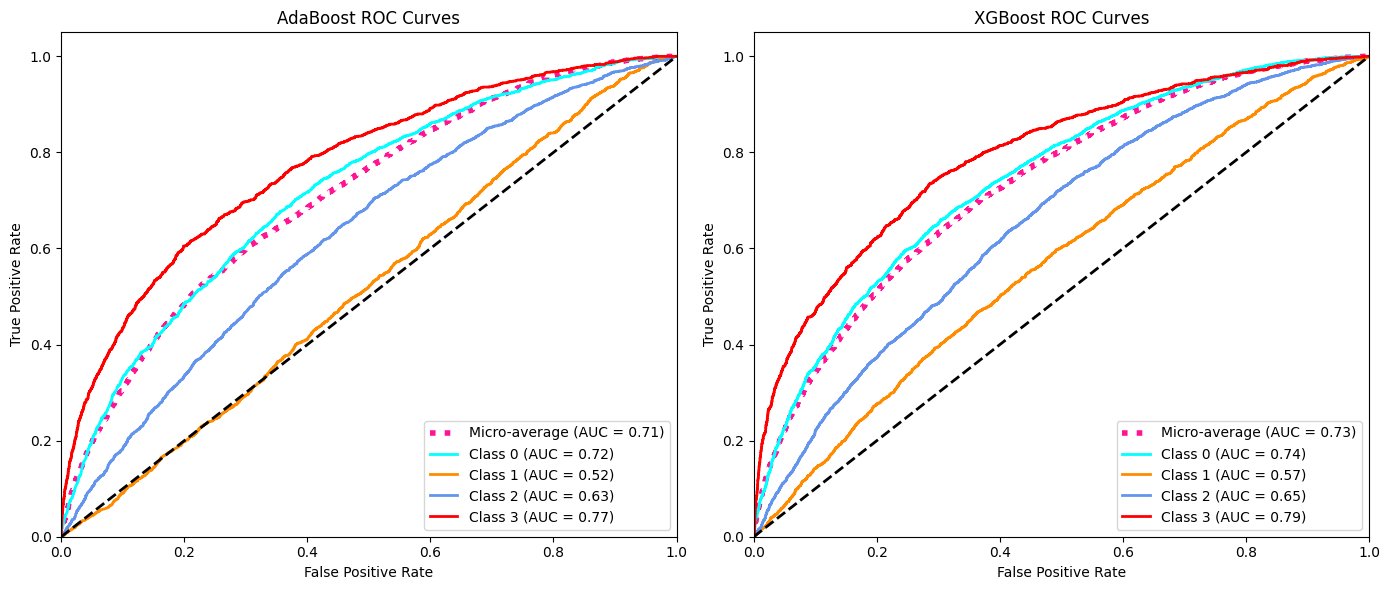

In [ ]:
# Obtain predicted probabilities from each model
y_ada_proba = ada_model.predict_proba(X_test_selected)
y_xgb_proba = xgb_model.predict_proba(X_test_selected)

# Binarize the true labels for multiclass ROC computation
classes = np.unique(y_df_test)
y_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = len(classes)

# Compute ROC curves and AUC for AdaBoost
fpr_ada = {}
tpr_ada = {}
roc_auc_ada = {}
for i in range(n_classes):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_test_bin[:, i], y_ada_proba[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])

# Compute micro-average ROC curve and AUC
fpr_ada["micro"], tpr_ada["micro"], _ = roc_curve(y_test_bin.ravel(), y_ada_proba.ravel())
roc_auc_ada["micro"] = auc(fpr_ada["micro"], tpr_ada["micro"])

# Compute ROC curves and AUC for XGBoost
fpr_xgb = {}
tpr_xgb = {}
roc_auc_xgb = {}
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_xgb_proba[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Compute micro-average ROC curve and AUC
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_bin.ravel(), y_xgb_proba.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Plot the ROC curves side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Define same colors 
colors = ["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"]

# Left Subplot: AdaBoost
ax1.plot(fpr_ada["micro"], tpr_ada["micro"],
         label="Micro-average (AUC = {0:0.2f})".format(roc_auc_ada["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr_ada[i], tpr_ada[i], color=color, lw=2,
             label="Class {0} (AUC = {1:0.2f})".format(classes[i], roc_auc_ada[i]))

ax1.plot([0, 1], [0, 1], "k--", lw=2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("AdaBoost ROC Curves")
ax1.legend(loc="lower right")

# Right Subplot: XGBoost 
ax2.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label="Micro-average (AUC = {0:0.2f})".format(roc_auc_xgb["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2,
             label="Class {0} (AUC = {1:0.2f})".format(classes[i], roc_auc_xgb[i]))

ax2.plot([0, 1], [0, 1], "k--", lw=2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("XGBoost ROC Curves")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [25]:
# Support Vector Machine (SVM)
# Using RBF kernel; probability=True to enable probability estimates if needed.
svm_model = SVC(kernel='rbf', probability=True, random_state=13)
svm_cv_scores = cross_val_score(svm_model, X_train_selected, y_df_train, cv=5, scoring='accuracy')
print("SVM CV Accuracy Scores:", svm_cv_scores)
print("SVM Mean CV Accuracy:", svm_cv_scores.mean())

SVM CV Accuracy Scores: [0.48097222 0.47826087 0.47187109 0.4753438  0.47728851]
SVM Mean CV Accuracy: 0.4767472990075783


In [26]:
svm_model.fit(X_train_selected, y_df_train)

# Predict on the test set.
y_pred_svm = svm_model.predict(X_test_selected)

# Calculate test accuracy.
test_accuracy_svm = accuracy_score(y_df_test, y_pred_svm)
print("SVM Test Accuracy:", test_accuracy_svm)

# Compute the confusion matrix.
cm = confusion_matrix(y_df_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)


SVM Test Accuracy: 0.4777197466385154
Confusion Matrix:
[[1946   12  990   43]
 [ 711    8  895   84]
 [ 845    8 1955  142]
 [ 187    9  774  390]]


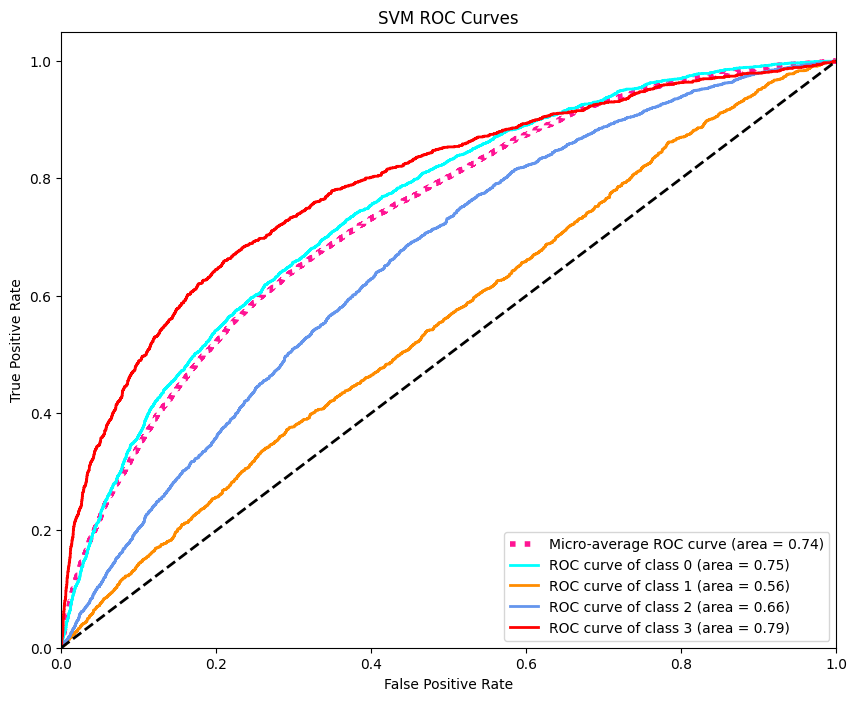

In [27]:
# Get predicted probabilities from the best SVM model
y_svm_proba = svm_model.predict_proba(X_test_selected)

# Binarize the true test labels (for multiclass ROC)
classes = np.unique(y_df_test)
y_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = len(classes)

# Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_svm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_svm_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
         color="deeppink", linestyle=":", linewidth=4)

colors = ["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curves")
plt.legend(loc="lower right")
plt.show()
